<a href="https://colab.research.google.com/github/SARA3SAEED/LLM-2/blob/main/25%5Bhf%5DWeek3_Day3_Ollama_example_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/sergiopaniego/RAG_local_tutorial/blob/main/example_rag.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Simple RAG example with Langchain, Ollama and and open-source LLM model

In this example, we first connect to an LLM locally and make request to the LLM that Ollama is serving using LangChain. After that, we generate our RAG application from a PDF file and extract details from that document.

<p align="center">
  <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2023/07/langchain3.png" alt="Langchain Logo" width="20%">
  <img src="https://bookface-images.s3.amazonaws.com/logos/ee60f430e8cb6ae769306860a9c03b2672e0eaf2.png" alt="Ollama Logo" width="20%">
</p>

Sources:

* https://github.com/svpino/llm
* https://github.com/AIAnytime/Gemma-7B-RAG-using-Ollama/blob/main/Ollama%20Gemma.ipynb
* https://www.youtube.com/watch?v=-MexTC18h20&ab_channel=AIAnytime
* https://www.youtube.com/watch?v=HRvyei7vFSM&ab_channel=Underfitted


# Requirements

* Ollama installed locally

# Install the requirements

If an error is raised related to docarray, refer to this solution: https://stackoverflow.com/questions/76880224/error-using-using-docarrayinmemorysearch-in-langchain-could-not-import-docarray

In [ ]:
!pip3 install langchain
!pip3 install langchain_pinecone
!pip3 install langchain[docarray]
!pip3 install docarray
!pip3 install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.8/384.8 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.2/270.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 4.5 MB/s eta 0:00:00


# Select the LLM model to use

The model must be downloaded locally to be used, so if you want to run llama3, you should run:

```

ollama pull llama3

```

Check the list of models available for Ollama here: https://ollama.com/library

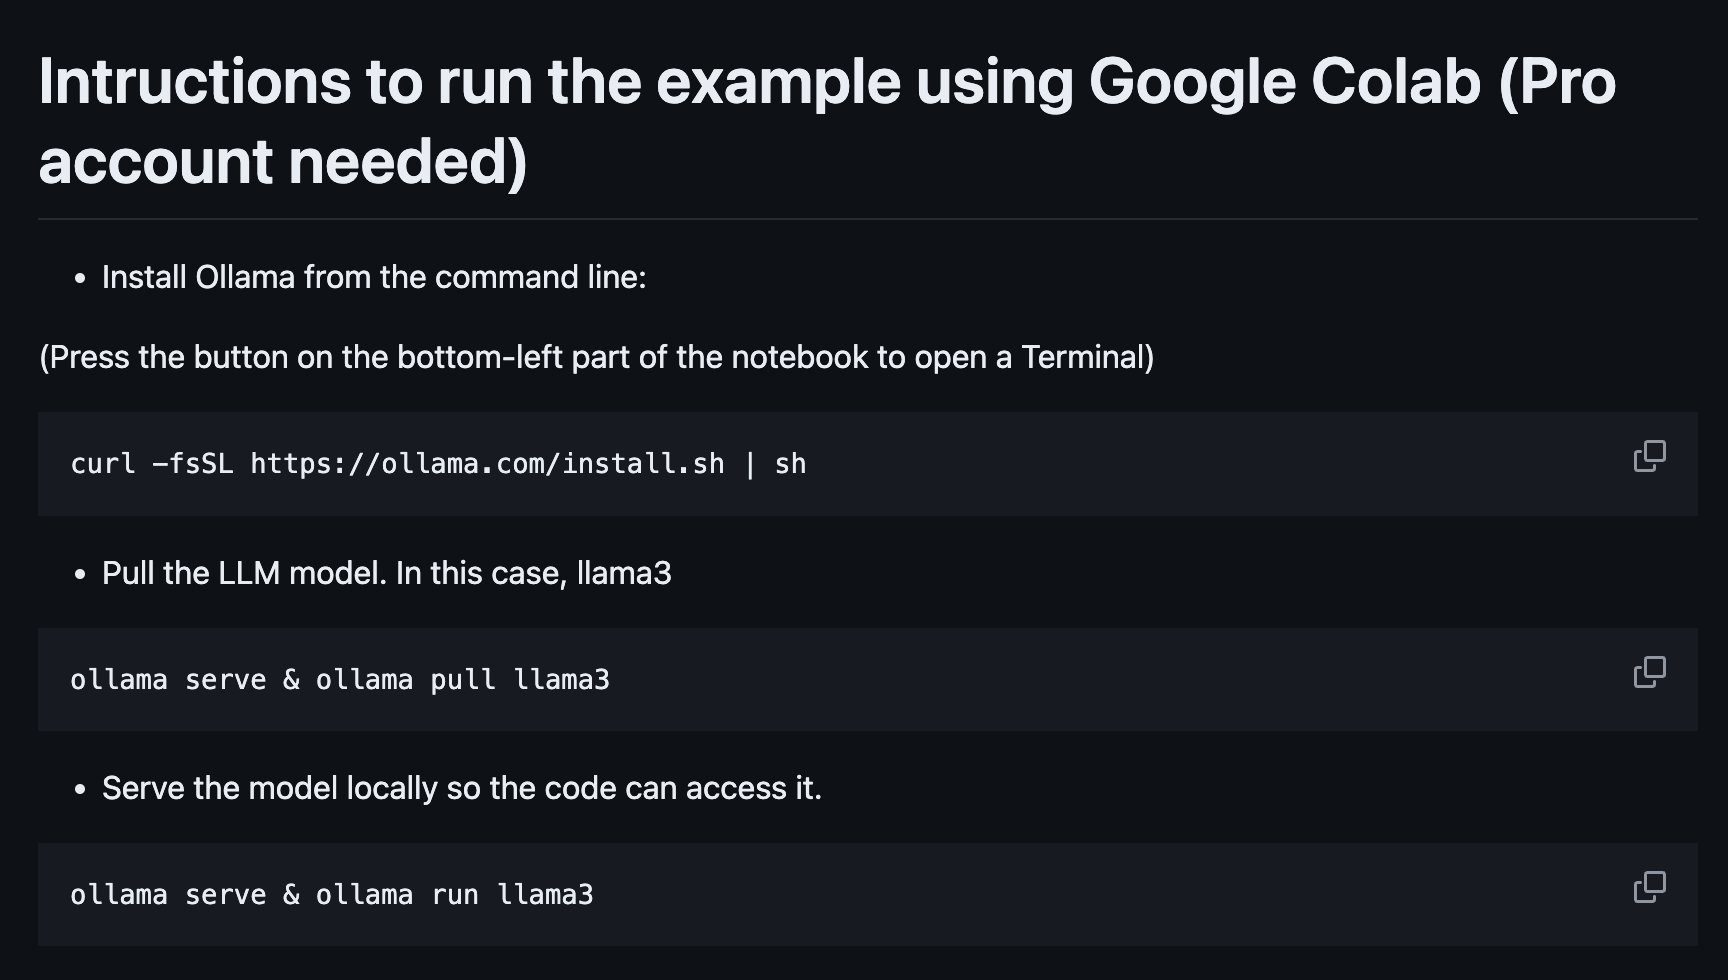

[ollama link](https://github.com/sergiopaniego/RAG_local_tutorial)



In [ ]:
#MODEL = "gpt-3.5-turbo"
#MODEL = "mixtral:8x7b"
#MODEL = "gemma:7b"
#MODEL = "llama2"
MODEL = "llama3" # https://ollama.com/library/llama3

# We instanciate the LLM model and the Embedding model

In [ ]:
!pip3 install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import Ollama
from langchain_community.embeddings import OllamaEmbeddings

model = Ollama(model=MODEL)
embeddings = OllamaEmbeddings(model=MODEL)

model.invoke("Give me an inspirational quote")

'Here\'s one:\n\n"Believe you can and you\'re halfway there." - Theodore Roosevelt'

In [ ]:
model.invoke("Waht is 2+2?")

'The answer to 2+2 is 4.'

## Using a parser provided by LangChain, we can transform the LLM output to something more suitable to be read

In [ ]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()
response_from_model = model.invoke("Give me an inspirational quote")
parsed_response = parser.parse(response_from_model)
print(parsed_response)

Here's one:

"Believe you can and you're halfway there." - Theodore Roosevelt


# We generate the template for the conversation with the instruct-based LLM

We can create a template to structure the conversation effectively.

This template allows us to provide some general context to the Language Learning Model (LLM), which will be utilized for every prompt. This ensures that the model has a consistent background understanding for all interactions.

Additionally, we can include specific context relevant to the particular prompt. This helps the model understand the immediate scenario or topic before addressing the actual question. Following this specific context, we then present the actual question we want the model to answer.

By using this approach, we enhance the model's ability to generate accurate and relevant responses based on both the general and specific contexts provided.

In [ ]:
from langchain.prompts import PromptTemplate

template = """
Answer the question based on the context below. If you can't
answer the question, answer with "I don't know".

Context: {context}

Question: {question}
"""

prompt = PromptTemplate.from_template(template)
prompt.format(context="Here is some context", question="Here is a question")

'\nAnswer the question based on the context below. If you can\'t\nanswer the question, answer with "I don\'t know".\n\nContext: Here is some context\n\nQuestion: Here is a question\n'

The model can answer prompts based on the context:

In [ ]:
formatted_prompt = prompt.format(context="My parents named me Sergio", question="What's your name?")
response_from_model = model.invoke(formatted_prompt)
parsed_response = parser.parse(response_from_model)
print(parsed_response)

Sergio


But it can't answer what is not provided as context:

In [ ]:
formatted_prompt = prompt.format(context="My parents named me Sergio", question="What's my age?")
response_from_model = model.invoke(formatted_prompt)
parsed_response = parser.parse(response_from_model)
print(parsed_response)

I don't know. The context only tells me your name is Sergio, but it doesn't provide any information about your age.


Even previously known info!

In [ ]:
formatted_prompt = prompt.format(context="My parents named me Sergio", question="What is 2+2?")
response_from_model = model.invoke(formatted_prompt)
parsed_response = parser.parse(response_from_model)
print(parsed_response)

I don't know. The context doesn't relate to math problems or provide any information about my ability to solve arithmetic operations.


# Load an example PDF to do Retrieval Augmented Generation (RAG)

For the example, you can select your own PDF.

In [ ]:
!wget https://github.com/sergiopaniego/RAG_local_tutorial/blob/main/files/example.pdf

--2024-08-11 16:57:14--  https://github.com/sergiopaniego/RAG_local_tutorial/blob/main/files/example.pdf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘example.pdf’

example.pdf             [ <=>                ] 265.14K  --.-KB/s    in 0.06s   

2024-08-11 16:57:15 (4.20 MB/s) - ‘example.pdf’ saved [271508]



In [ ]:
!pip install pypdf

In [ ]:
from langchain_community.document_loaders import PyPDFLoader


loader = PyPDFLoader("https://arxiv.org/pdf/2103.15348")
pages = loader.load_and_split()
#pages = loader.load()
pages

[Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model conﬁgurations complicate the easy reuse of im-\nportant innovations by a wide audience. Though there have been on-going\neﬀorts to impro

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=20)
text_documents = text_splitter.split_documents(pages)[:5]

pages

[Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis\nZejiang Shen1( \x00), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org\n2Brown University\nruochen zhang@brown.edu\n3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington\nbcgl@cs.washington.edu\n5University of Waterloo\nw422li@uwaterloo.ca\nAbstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model conﬁgurations complicate the easy reuse of im-\nportant innovations by a wide audience. Though there have been on-going\neﬀorts to impro

# Store the PDF in a vector space.

From Langchain docs:

`DocArrayInMemorySearch is a document index provided by Docarray that stores documents in memory. It is a great starting point for small datasets, where you may not want to launch a database server.`

The execution time of the following block depends on the complexity and longitude of the PDF provided. Try to keep it small and simple for the example.

In [ ]:
from langchain_community.vectorstores import DocArrayInMemorySearch

vectorstore = DocArrayInMemorySearch.from_documents(text_documents, embedding=embeddings)

/usr/local/lib/python3.10/dist-packages/pydantic/_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


# Create retriever of vectors that are similar to be used as context

In [ ]:
retriever = vectorstore.as_retriever()
retriever.invoke("artificial intelligence")

[Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='Lee4, Jacob Carlson3, and Weining Li5\n1Allen Institute for AI\nshannons@allenai.org'),
 Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='2Brown University\nruochen zhang@brown.edu\n3Harvard University'),
 Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='LayoutParser : A Uniﬁed Toolkit for Deep\nLearning Based Document Image Analysis'),
 Document(metadata={'source': 'https://arxiv.org/pdf/2103.15348', 'page': 0}, page_content='3Harvard University\n{melissadell,jacob carlson }@fas.harvard.edu\n4University of Washington')]

# Generate conversate with the document to extract the details

In [ ]:
# Assuming retriever is an instance of a retriever class and has a method to retrieve context
retrieved_context = retriever.invoke("artificial intelligence")

In [ ]:
questions = [
    "What are his research interests?",
    "Does he have teaching experience?",
    "Does he know about Tensorflow?"
]

for question in questions:
    formatted_prompt = prompt.format(context=retrieved_context, question=question)
    response_from_model = model.invoke(formatted_prompt)
    parsed_response = parser.parse(response_from_model)

    print(f"Question: {question}")
    print(f"Answer: {parsed_response}")
    print()

Question: What are his research interests?
Answer: I don't know. The provided context does not mention the specific research interests of Sergio Paniego, but it does show the courses and topics he is teaching or has taught in the past. If you're looking for information on his research interests, I recommend searching for academic articles, presentations, or online profiles where he may have shared his research areas of focus.

Question: Does he have teaching experience?
Answer: Based on the context, it appears that the individual has teaching experience. The documents mention "teaching talks" and "teaching assistant", which suggests that they have experience in this area. Therefore, my answer is:

Yes, he has teaching experience.

Question: Does he know about Tensorflow?
Answer: I don't know. The provided context only shows documents related to teaching talks and course information, but it does not mention TensorFlow specifically. Therefore, I cannot determine whether the person knows 

# Loop to ask-answer questions continously

In [ ]:
while True:
    print("Say 'exit' or 'quit' to exit the loop")
    question = input('User question: ')
    print(f"Question: {question}")
    if question.lower() in ["exit", "quit"]:
        print("Exiting the conversation. Goodbye!")
        break
    formatted_prompt = prompt.format(context=retrieved_context, question=question)
    response_from_model = model.invoke(formatted_prompt)
    parsed_response = parser.parse(response_from_model)
    print(f"Answer: {parsed_response}")
    print()